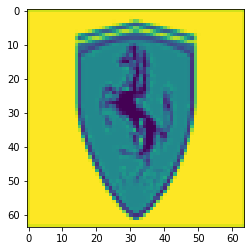

['Ferrari']


In [6]:
from flask import Flask, request, jsonify
from flask.logging import create_logger
import logging

import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from PIL import Image, ImageFilter,ImageOps


def predict(pth):
    
    response = requests.get(pth)
    image = Image.open(BytesIO(response.content))
    #image = Image.open(pth)

    image = ImageOps.grayscale(image)
    image = ImageOps.equalize(image)
    image = np.asarray(image.resize([64,64]),dtype="int32")
    plt.imshow(image)
    plt.show()
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                   cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    
    hog_img = np.array(fd).reshape(1,-1)
    
    sc = joblib.load("std_scaler.bin")
    scaled_img = sc.transform(hog_img)
    
    predict = clf.predict(scaled_img)
    return predict

if __name__ == "__main__":
    clf = joblib.load("logo_classifier.joblib")
    #app.run(host='0.0.0.0', port=80, debug=True)
    #path = easygui.fileopenbox()
    url = "https://i.pinimg.com/originals/f5/40/ca/f540ca3b29d055dcacdd44d1750ae8e9.jpg"
    print(predict(url))
    

In [6]:
!pip show Pillow

Name: Pillow
Version: 7.0.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /opt/anaconda3/lib/python3.7/site-packages
Requires: 
Required-by: scikit-image, imageio, bokeh
